<a href="https://colab.research.google.com/github/SiEggo/PA_Datmin_Kel5_A1/blob/main/Unsuper_PA_Datmin_Kel5_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Unsupervised

## Nama Kelompok 5 A1
1. Ahmad Yunus
2. Maghfira Khansa Aulia
3. Panji Mugni Ramadhani

Dataset diperoleh dari kaggle : https://www.kaggle.com/datasets/arjunbhasin2013/ccdata





<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>



## Bussiness Understanding


Tujuan analisis dari dataset ini adalah untuk memahami risiko kredit pelanggan. Dataset ini berisi informasi tentang perilaku kartu kredit pelanggan di bank selama periode waktu tertentu. Informasi yang terdapat pada dataset ini mencakup saldo akun, frekuensi pembelian, jumlah transaksi, jumlah uang muka tunai yang diambil, batas kredit, dan sebagainya. Analisis dari dataset ini akan membantu bank dalam mengidentifikasi pola perilaku pelanggan dan mengelola risiko kredit dengan lebih efektif.

### Business Objcetive

 Tujuan analisis adalah untuk memahami risiko kredit pelanggan adalah sebagai berikut:
1. Mengurangi risiko kredit dengan mengidentifikasi nasabah yang memiliki risiko kredit yang tinggi dan mengembangkan strategi pengelolaan risiko yang tepat.
2. Mengidentifikasi pola pembelian dan pengambilan uang muka tunai pelanggan yang berisiko tinggi untuk kemungkinan pembayaran keterlambatan atau tidak lancar.
3. Menentukan apakah batas kredit yang ditawarkan sesuai dengan risiko kredit pelanggan, sehingga dapat mengoptimalkan keuntungan dan meminimalkan risiko kredit.

### Assess Situation

1. Menganalisis tujuan bisnis mempelajari risiko kredit pelanggan.
2. Menganalisis penggunaan limit kredit oleh pelanggan dan persentase saldo yang dibayarkan secara penuh setiap bulannya.
3. Menganalisis kekuatan dan kelemahan perusahaan dalam mengelola kartu kredit.
4. Melakukan analisis terhadap jangka waktu akun pelanggan dan mengidentifikasi apakah ada korelasi antara jangka waktu akun dan risiko kredit.

### Data Mining Goals

Tujuan-tujuan yang ingin dicapai oleh perusahaan melalui analisis data mining pada data yang dimiliki
1. Menganalisis faktor-faktor yang berpengaruh pada risiko kredit pelanggan, seperti jumlah saldo, jumlah pembelian, dan sebagainya.
2. Mengidentifikasi faktor-faktor yang mempengaruhi risiko kredit atau kemungkinan terjadinya tunggakan pembayaran oleh pelanggan.
3. Menemukan pola dan tren dalam data yang dapat membantu perusahaan untuk mengidentifikasi pelanggan yang berisiko tinggi dan mengambil tindakan yang tepat untuk mengurangi risiko kredit.

### Produce Project Plan

Tahap perencanaan yang bertujuan untuk membuat rencana proyek secara rinci dan terperinci.
1. Tentukan tujuan proyek secara detail, yaitu memahami risiko kredit pelanggan pada dataset tersebut
2. Kumpulkan dan eksplorasi data yang ada pada dataset, memahami struktur dan jenis variabelnya.
3. Lakukan preprocessing data seperti menghilangkan nilai kosong (missing value), normalisasi data, dan menghapus variabel yang tidak relevan.
4. Lakukan analisis deskriptif pada dataset, dengan melihat distribusi variabel-variabel penting seperti jumlah saldo, frekuensi pembelian, dan pembayaran minimum.
5. Lakukan analisis clustering untuk mengelompokkan pelanggan berdasarkan profil risiko kreditnya.

## LIBBARY

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Understanding

### Data Collection

In [ ]:
# Membaca Dataset
df = pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# Data 10 Teratas
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
# Melihat typedata tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

1. CUST_ID: ID pelanggan
2. BALANCE: saldo kartu kredit
3. BALANCE_FREQUENCY: frekuensi pembayaran saldo bulanan
4. PURCHASES: jumlah total pembelian yang dilakukan pada kartu kredit
5. ONEOFF_PURCHASES: jumlah pembelian satu kali (pembelian tunggal) yang dilakukan pada kartu kredit
6. INSTALLMENTS_PURCHASES: jumlah pembelian yang dilakukan dalam angsuran pada kartu kredit
7. CASH_ADVANCE: jumlah uang yang ditarik dari kartu kredit sebagai uang muka
8. PURCHASES_FREQUENCY: frekuensi pembelian bulanan
9. ONEOFF_PURCHASES_FREQUENCY: frekuensi pembelian satu kali bulanan
10. PURCHASES_INSTALLMENTS_FREQUENCY: frekuensi pembelian angsuran bulanan
11. CASH_ADVANCE_FREQUENCY: frekuensi penarikan uang muka bulanan
12. CASH_ADVANCE_TRX: jumlah transaksi penarikan uang muka
13. PURCHASES_TRX: jumlah transaksi pembelian
14. CREDIT_LIMIT: batas kredit yang disetujui untuk kartu kredit
15. PAYMENTS: jumlah total pembayaran yang dilakukan oleh pelanggan
16. MINIMUM_PAYMENTS: jumlah pembayaran minimum yang harus dilakukan oleh pelanggan
17. PRC_FULL_PAYMENT: persentase pembayaran penuh bulanan oleh pelanggan
18. TENURE: masa berlaku kartu kredit dalam tahun

In [ ]:
# Mengecek nilai null tiap kolom
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Describe Data

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## VISUALISASI 

### *Visualisasi* Perbandingan

<Axes: xlabel='TENURE', ylabel='count'>

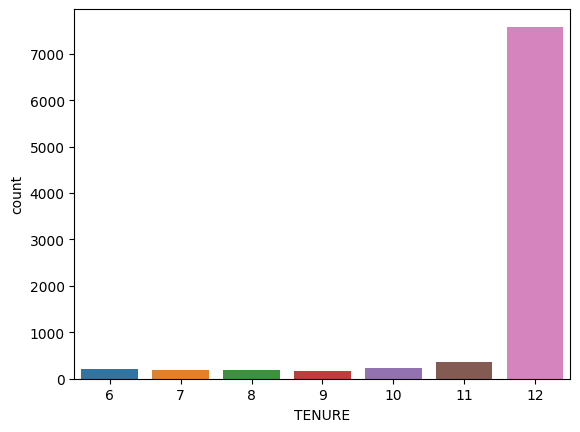

In [ ]:
sns.countplot(x= "TENURE", data=df)

Pada visualisasi diatas, tertampil masa berlaku kartu kredit dalam tahun itu terbanyak pada angka 12

<Axes: xlabel='CREDIT_LIMIT', ylabel='count'>

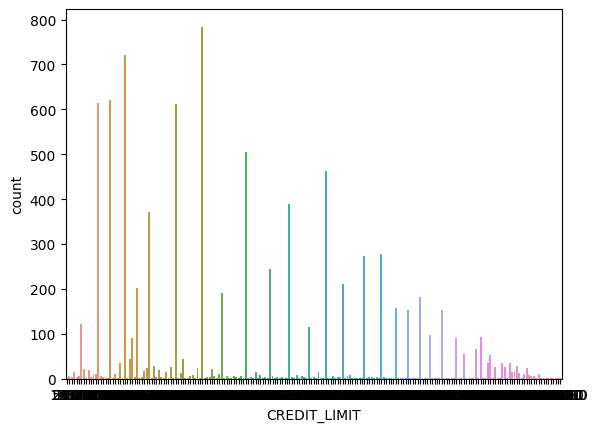

In [ ]:
sns.countplot(x= "CREDIT_LIMIT", data=df)

Pada visualisasi diatas, batas credit limit tiap credit limit mempunyai batasnya beragam

<Axes: xlabel='CREDIT_LIMIT', ylabel='count'>

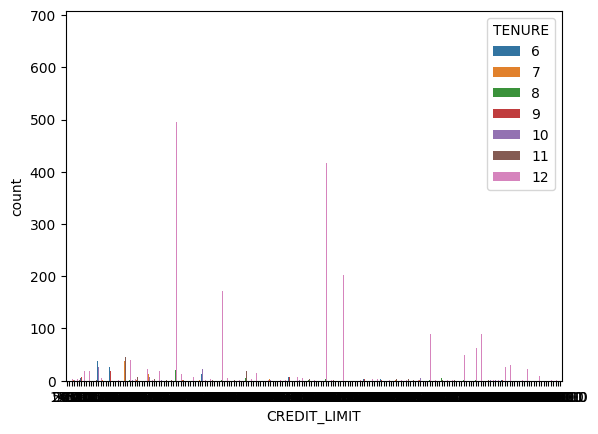

In [ ]:
sns.countplot (x= "CREDIT_LIMIT", hue="TENURE", data=df)

Pada visualisasi diatas, batas credit limit banyak menggunakan batas waktu dalam setahun tenure 12

### Visualisasi Distribusi dan Pemusatan

<Axes: xlabel='CREDIT_LIMIT', ylabel='Count'>

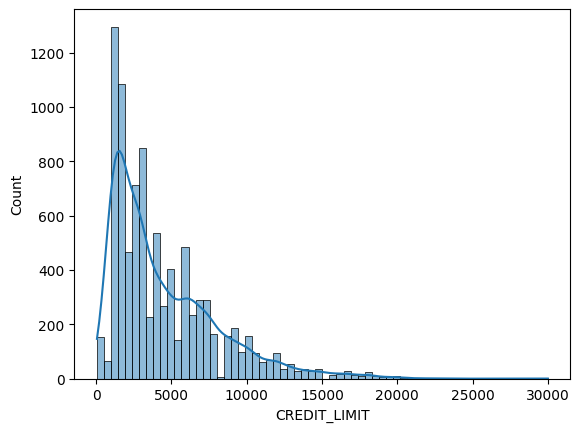

In [ ]:
sns.histplot(data=df,x="CREDIT_LIMIT", kde=True)

<Axes: xlabel='CREDIT_LIMIT'>

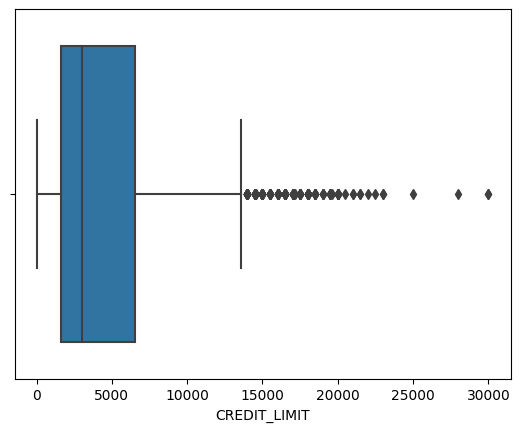

In [ ]:
sns.boxplot(data=df, x="CREDIT_LIMIT")

<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Count'>

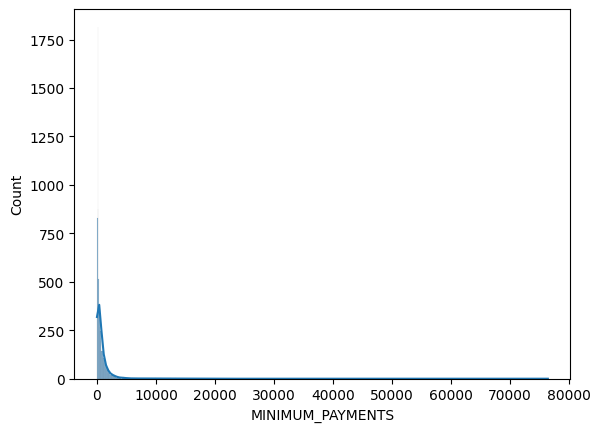

In [ ]:
sns.histplot(data=df,x="MINIMUM_PAYMENTS", kde=True)

<Axes: xlabel='MINIMUM_PAYMENTS'>

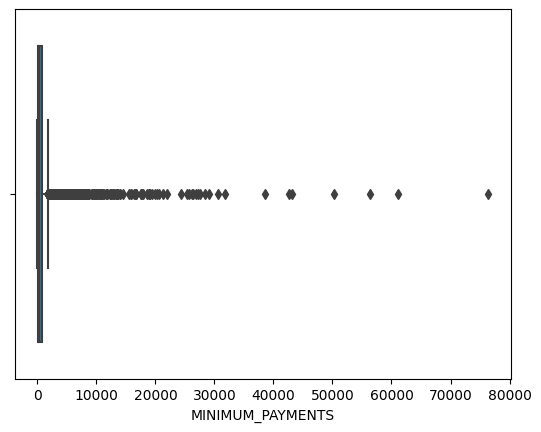

In [ ]:
sns.boxplot(data=df, x="MINIMUM_PAYMENTS")

Visualisasi Distribution menunjukkan persebaran data, visualisasi ini sangat membantu dalam menampilkan skewness suatu data.

* Histogram umur customer yang melihat frekuensi  dalam histogram.
*Histogram yang melihat frekuensi  pada setiap customer dalam histogram.
*Boxplot untuk menampilkan 
*Boxplot  untuk menampilkan .

### Visualisasi Komposisi

In [ ]:
import plotly.express as px

In [ ]:
px.pie(df,names=("TENURE"))

In [ ]:
px.pie(df,names=("CREDIT_LIMIT"))

### Visualisasi Korelasi

<ipython-input-17-e39b9a845ebe>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



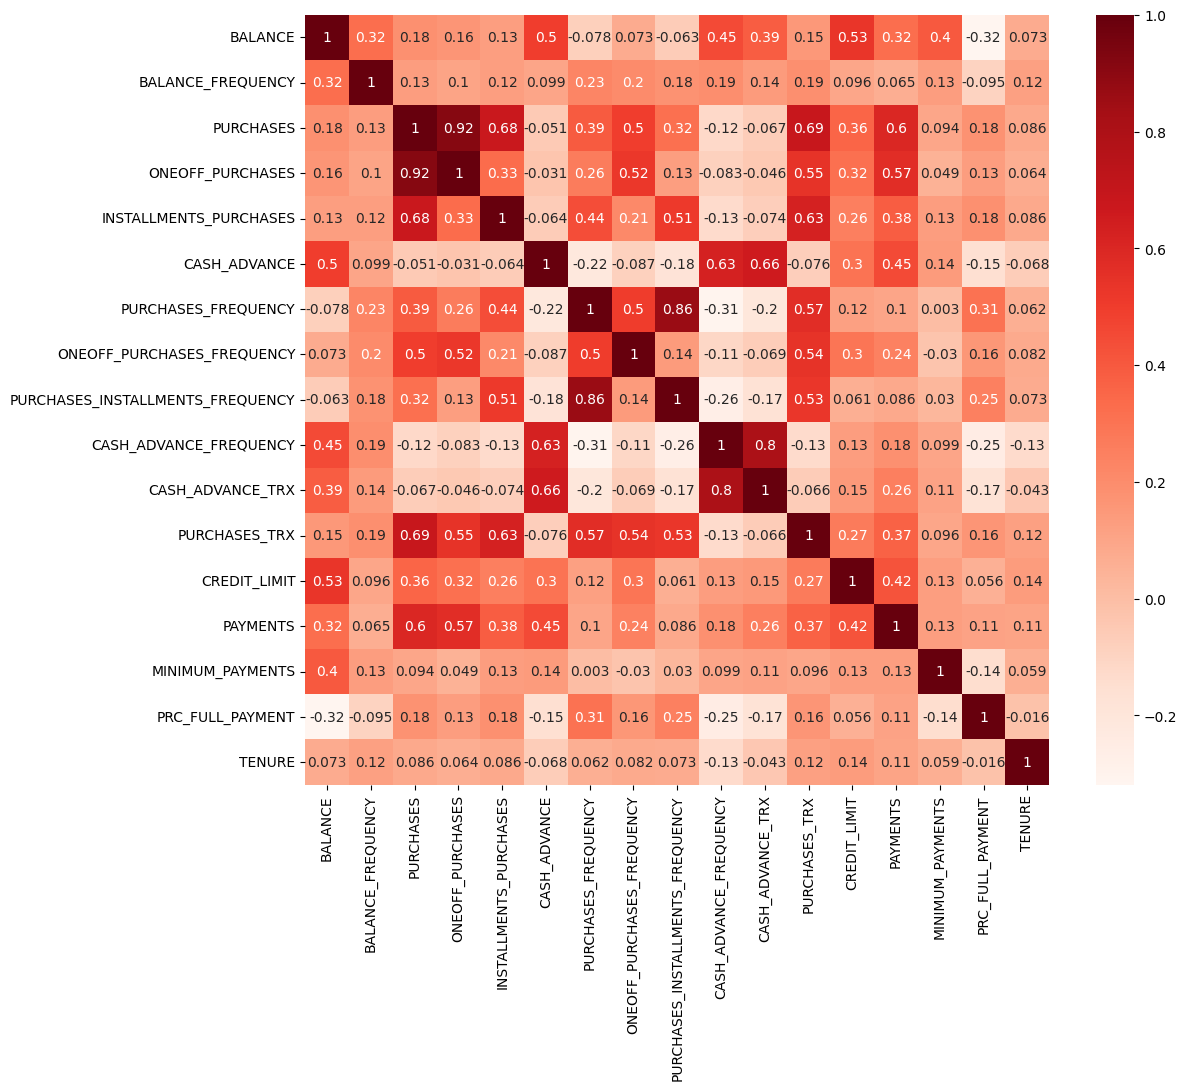

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

## Data Preparation

### Select Data

In [ ]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Cleaning data

Tujuan dari cleaning data pada dataset adalah untuk memastikan bahwa data yang digunakan dalam analisis atau pemodelan memiliki kualitas yang baik, terstruktur dengan baik, dan bebas dari kesalahan atau inkonsistensi.

Proses cleaning data melibatkan identifikasi dan penanganan data yang hilang, data yang duplikat, data yang tidak konsisten, dan kesalahan penulisan. Dengan membersihkan dataset, hasil analisis atau pemodelan yang dihasilkan akan lebih akurat dan dapat diandalkan. Selain itu, hal ini juga dapat membantu meminimalkan risiko pengambilan keputusan yang buruk berdasarkan data yang tidak valid atau tidak tepat.

### Clean Data - Handling Different Datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

1. CUST_ID: ID pelanggan
2. BALANCE: saldo kartu kredit
3. BALANCE_FREQUENCY: frekuensi pembayaran saldo bulanan
4. PURCHASES: jumlah total pembelian yang dilakukan pada kartu kredit
5. ONEOFF_PURCHASES: jumlah pembelian satu kali (pembelian tunggal) yang dilakukan pada kartu kredit
6. INSTALLMENTS_PURCHASES: jumlah pembelian yang dilakukan dalam angsuran pada kartu kredit
7. CASH_ADVANCE: jumlah uang yang ditarik dari kartu kredit sebagai uang muka
8. PURCHASES_FREQUENCY: frekuensi pembelian bulanan
9. ONEOFF_PURCHASES_FREQUENCY: frekuensi pembelian satu kali bulanan
10. PURCHASES_INSTALLMENTS_FREQUENCY: frekuensi pembelian angsuran bulanan
11. CASH_ADVANCE_FREQUENCY: frekuensi penarikan uang muka bulanan
12. CASH_ADVANCE_TRX: jumlah transaksi penarikan uang muka
13. PURCHASES_TRX: jumlah transaksi pembelian
14. CREDIT_LIMIT: batas kredit yang disetujui untuk kartu kredit
15. PAYMENTS: jumlah total pembayaran yang dilakukan oleh pelanggan
16. MINIMUM_PAYMENTS: jumlah pembayaran minimum yang harus dilakukan oleh pelanggan
17. PRC_FULL_PAYMENT: persentase pembayaran penuh bulanan oleh pelanggan
18. TENURE: masa berlaku kartu kredit dalam tahun

Menurut output di atas, kita memiliki 8950 entri atau baris, serta 18 fitur. Dimana tiap kolom pada dataset ini memiliki type data float64 ada 14, int64 ada 3, object ada 1

### Clean Data - Handling Null

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat ada nilai null pada

CREDIT_LIMIT = 1

MINIMUM_PAYMENT = 313

In [ ]:
# Periksa nilai rata-rata credit limit untuk mengganti nilai yang hilang
df.CREDIT_LIMIT.describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [ ]:
# Memeriksa jumlah nilai nol dalam fitur credit limmit.
df.CREDIT_LIMIT.isnull().sum()

1

In [ ]:
# Mengganti Nilai Nol dengan rata-rata credit limit - 4494.4494
# Saya membulatkan nilainya menjadi 4494.
df.CREDIT_LIMIT.fillna(4494, inplace=True)
df.CREDIT_LIMIT.isnull().sum()

0

In [ ]:
# Periksa nilai rata-rata minimum payment untuk mengganti nilai yang hilang
df.MINIMUM_PAYMENTS.describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [ ]:
# Mengganti Nilai Nol dengan rata-rata minimum payment - 864.206
# Saya membulatkan nilainya menjadi 864
df.MINIMUM_PAYMENTS.fillna(864, inplace=True)
df.MINIMUM_PAYMENTS.isnull().sum()

0

In [ ]:
# Tidak ada lagi Nilai Hilang dan Null.
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Pada hasil diatas, menunjukan tidak ada nilai null pada setiap variabel

### Clean Data - Handling Duplicate

In [ ]:
# Mengecek apakah ada data yang duplicate
df[df.duplicated()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


Pada gambar diatas, terlihat tidak ada data yang duplicate

In [ ]:
# Menampilkan jumlah baris dan kolom sebelum menghapus duplikat
print("Jumlah baris dan kolom sebelum menghapus duplikat:", df.shape)

Jumlah baris dan kolom sebelum menghapus duplikat: (8950, 18)


In [ ]:
# Mencari baris duplikat
dup = df.duplicated()

In [ ]:
# Menampilkan jumlah baris duplikat
print("Jumlah baris duplikat:", sum(dup))

Jumlah baris duplikat: 0


Dilihat data diatas, dikarenakan tidak ada data duplicate, jadi tidak perlu melakukan hapus duplicat

### Clean Data - Remove unnecessary Columns

In [ ]:
# hapus kolom CUST_ID
df.drop(columns=['CUST_ID'], inplace=True)

In [ ]:
# lihat hasil
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Dataset Description

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449400,1733.143852,864.199319,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.000000,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


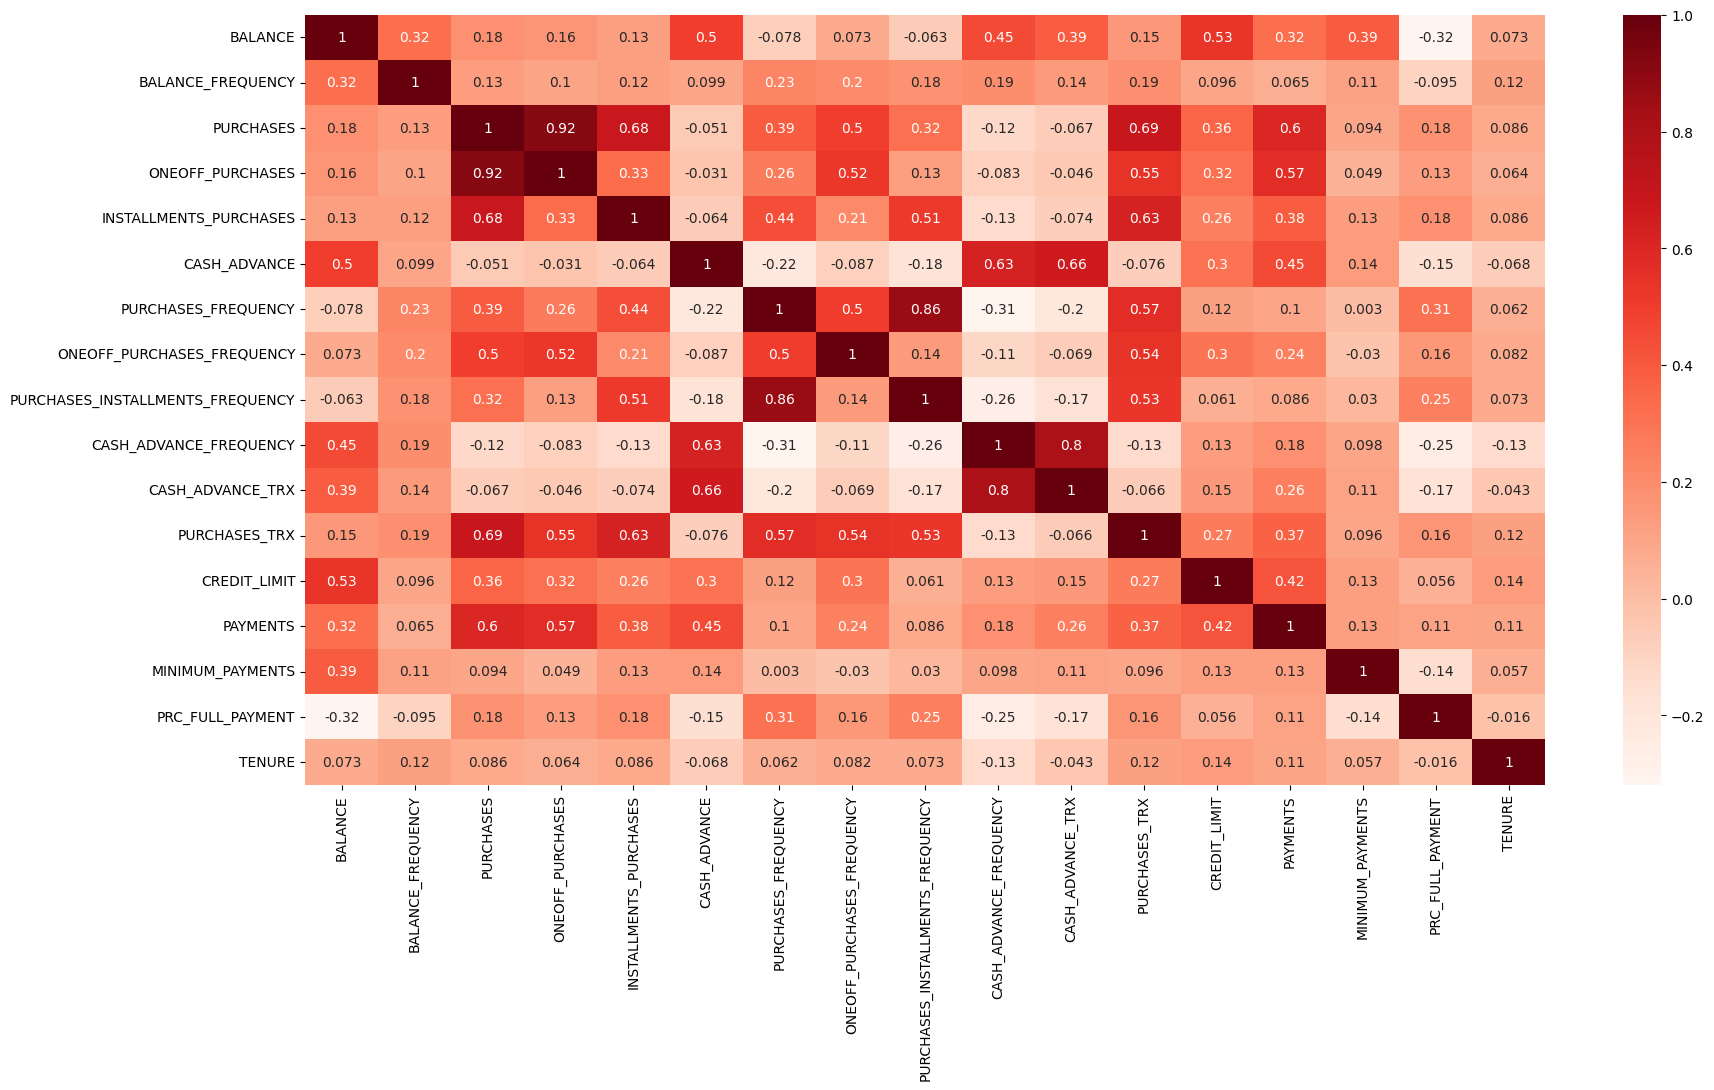

In [ ]:
# Korelasi
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

## Univariate Analysis

### Distribusi

Pertama kita dapat melihat distribusi dan persebaran dari BALANCE, PAYMENTS, CREDIT_LIMIT

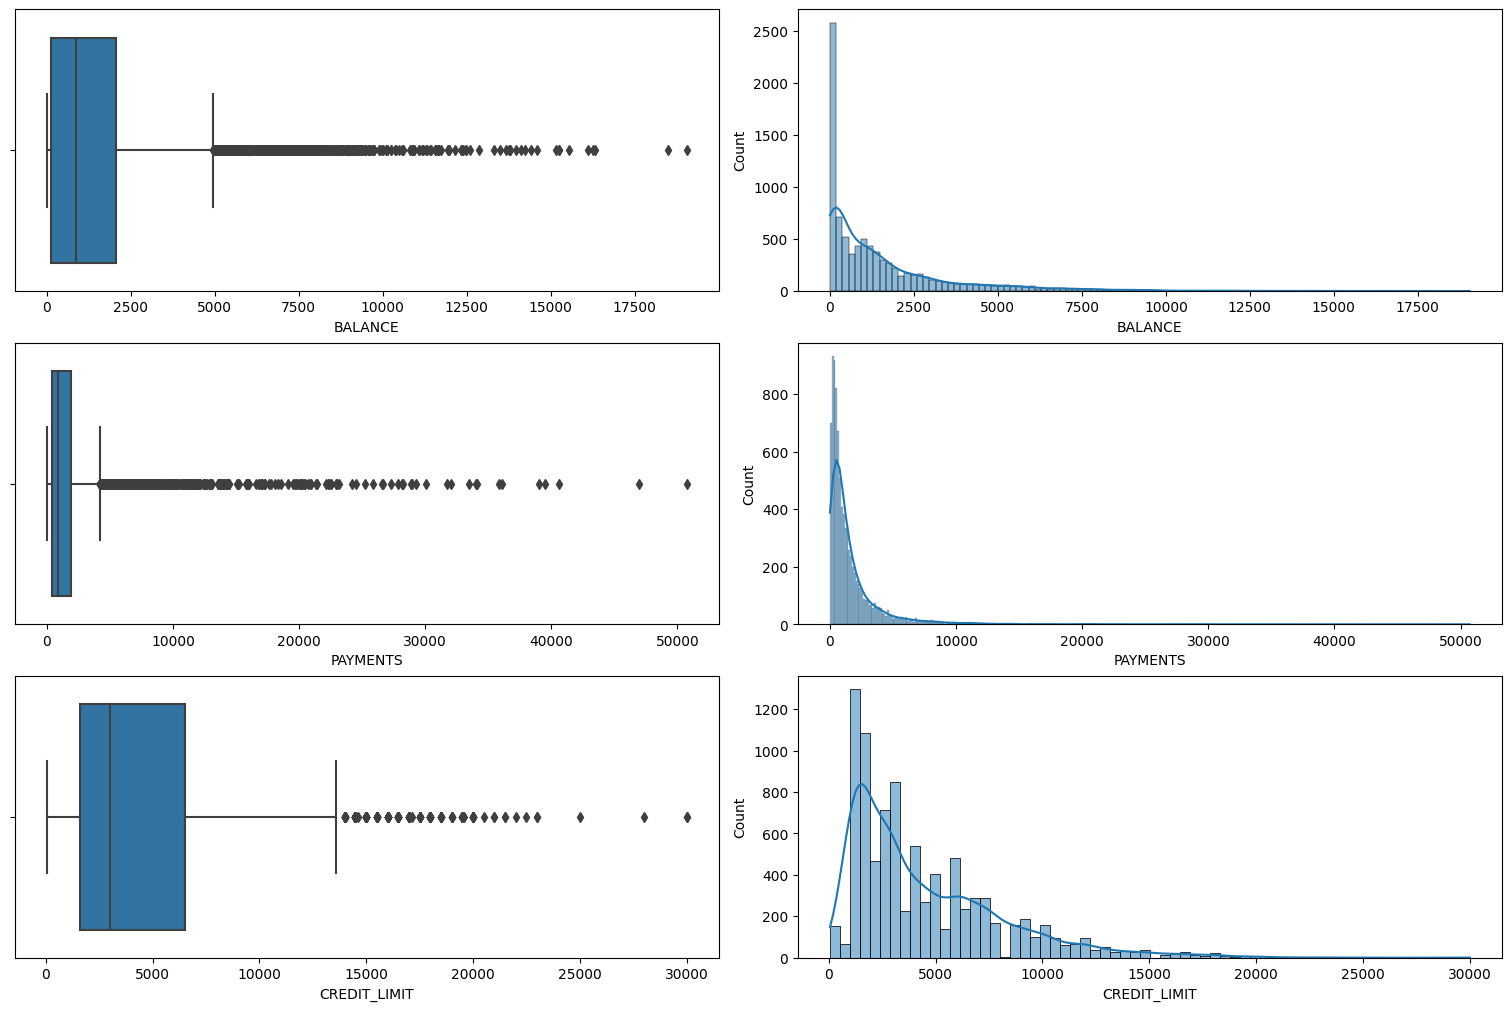

In [ ]:
cols = ["BALANCE","PAYMENTS","CREDIT_LIMIT"]
fig, axes = plt.subplots(3, 2, figsize=(15, 10),constrained_layout = True)

for ax,col in zip(axes,cols):
    sns.boxplot(data=df,x=col,ax=ax[0])
    sns.histplot(df,x=col,ax=ax[1],kde=True)

Pad visualisasi distribusi diatas. Ditemukan bahwa :



1.   Pemilik saldo kartu kredit terbanyak pada 0 dolar atau 1000-1200 dolar
2.   Jumlah total pembelian pengguna tertinggi terdapat pada 250-500 dolar.
3.   Batas kredit yang dibatasi terbanyak terdapat di 1000-3000 dolar


## Multivariate Analysis

In [ ]:
df_corr = pd.get_dummies(df).corr()

In [ ]:
px.imshow(df_corr)

menampilkan sebuah heatmap yang memberikan informasi visual tentang hubungan korelasi antar variabel dalam dataset.

In [ ]:
fig = px.scatter_matrix(df,dimensions=cols,color="TENURE")
fig.update_layout(dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')
fig.show()

menampilkan scatter matrix plot dengan matriks scatter plot dari kombinasi variabel yang diberikan. Setiap scatter plot pada diagonal utama akan menampilkan distribusi variabel tunggal, sementara scatter plot pada sel lainnya akan menampilkan hubungan scatter antara dua variabel yang berbeda. Warna pada scatter plot akan menunjukkan kategori variabel "TENURE".

## Modeling

### Pre Processing

In [ ]:
# Untuk Clustering
from sklearn.cluster import KMeans

# Untuk scalling dan normalisasi
from sklearn.preprocessing import StandardScaler

# Metric Pengukuran
# sumber : https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [ ]:
# PreProcessing
# Encoding DataTraining
X_train = pd.get_dummies(df,drop_first=True)

Dibuatlah sebuah class untuk memudahkan proses visualiasi,normalisasi, dan pengukuran cluster pada tiap algoritma cluster yang berbeda

In [ ]:
# Creating a class to handle clustering
class Cluster:
    
    # Pada constructor terjadi beberapa proses
    # 1. Membuat normalisasi data
    
    def __init__(self,train):
        self.train = train
        self.scaled = StandardScaler().fit_transform(self.train)
        self.clusters = None
        self.name = None
        self._label = None

    # Method apply adalah fungsi kedua yang harus dijalankan
    # Method apply akan menerima argumen tambahan sebagai argumen untuk 
    # algoritma cluster yang akan digunakan
    def apply(self,cluster_algo,**kwargs):
        agg_cluster = cluster_algo(**kwargs)


        self.clusters = agg_cluster.fit(self.scaled) #Set Value
        self._label = self.clusters.labels_ #Set value

        # Mengambil nama algoritma clusternya
        self.name = type(self.clusters).__name__

        return self
    
    # Df untuk membuat dataframe
    def df(self,normalized=False):

        if normalized:
            X = pd.DataFrame(self.scaled,columns=self.train.columns)
        else:
            X = self.train.copy(deep=True)
        
        X["Cluster"] = self._label
        X["Cluster"] = X['Cluster'].astype(object)

        return X
    # Untuk Mendapatkan cluster ke N
    def get_cluster(self,n,normalized=False):
        df = self.df(normalized)
        
        return df[df["Cluster"] == n]

    # Plot untuk membuat scatterplot 
    def plot(self,X,Y,normalized=False):
        return px.scatter(self.df(normalized), x=X, y=Y, color="Cluster")

    # Plot 3d untuk membuat scatterplot 3d
    def plot_3d(self,X,Y,Z,normalized=False):
        return px.scatter_3d(self.df(normalized), x=X, y=Y,z=Z, color="Cluster")

    # menggunakan decorator property untuk mengonversi method menjadi property
    @property
    def metric(self): #Method ini berfungsi untuk mengambil hasil pengukuran berdasrkan metric ...
        label = self._label
        # Ini metric yang digunakan 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'
        
        return [silhouette_score(self.scaled,label),davies_bouldin_score(self.scaled,label),calinski_harabasz_score(self.scaled,label)]

Menentukan banyak cluster maksimal.

Salah satu cara untuk menentukan banyak cluster maksimal adalah dengan menggunakan pengukuran SSE Jarak kuadrat antar centroid dari setiap cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

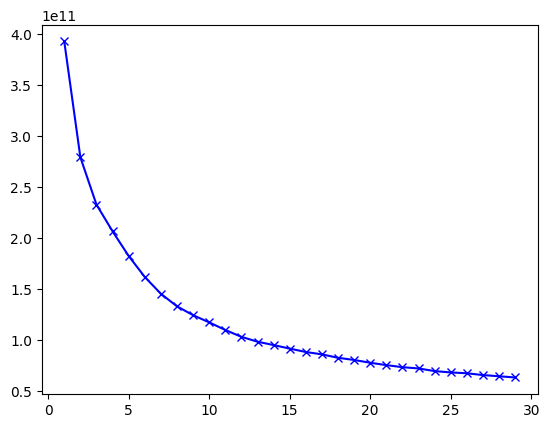

In [ ]:
sse = [] #Daftar SSE
K = range(1,30) #Banyak Cluster hingga 30
# Perulangan hingga 30 Cluster
for k in K:
    kmeans = KMeans(n_clusters= k,random_state=42).fit(X_train)
    #Mendapatkan SSE dan append ke list sse
    sse.append(kmeans.inertia_)

# Membuat plot K terhadap SSE
plt.plot(K,sse, "bx-")


Berdasarkan Plot diatas dan elbow rule, ** 3 ** ditentukan sebagai banyak cluster yang akan digunakan

### MODELING

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df1 = ["CREDIT_LIMIT", "BALANCE", "MINIMUM_PAYMENTS", "PAYMENTS"]

In [ ]:
df = df.dropna(subset=df1)

In [ ]:
data = df[df1].copy()

In [ ]:
data

,CREDIT_LIMIT,BALANCE,MINIMUM_PAYMENTS,PAYMENTS
0,1000.0,40.900749,139.509787,201.802084
1,7000.0,3202.467416,1072.340217,4103.032597
2,7500.0,2495.148862,627.284787,622.066742
3,7500.0,1666.670542,864.000000,0.000000
4,1200.0,817.714335,244.791237,678.334763
...,...,...,...,...
8945,1000.0,28.493517,48.886365,325.594462
8946,1000.0,19.183215,864.000000,275.861322
8947,1000.0,23.398673,82.418369,81.270775
8948,500.0,13.457564,55.755628,52.549959


### Pseudocode
Level tinggi

1. Menskalakan data untuk membakukan nilai
2. Inisialisasi centroid acak
3. Dapatkan label untuk setiap titik data
4. Buat centroid baru
4. Plot centroid
5. Ulangi 3 sampai centroid berhenti berubah

In [ ]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

Setiap fitur dalam dataset akan memiliki rentang nilai yang seragam antara 1 dan 10, dengan nilai minimum akan menjadi 1 dan nilai maksimum akan menjadi 10. Normalisasi ini berguna untuk memastikan bahwa setiap fitur memiliki pengaruh yang seimbang dalam analisis data, terlepas dari skala aslinya.

In [ ]:
data.describe()

,CREDIT_LIMIT,BALANCE,MINIMUM_PAYMENTS,PAYMENTS
count,8950.000000,8950.000000,8950.000000,8950.000000
mean,2.335561,1.739388,1.101793,1.307528
std,1.093406,0.983755,0.274523,0.513699
min,1.000000,1.000000,1.000000,1.000000
25%,1.465776,1.060627,1.020123,1.068008
50%,1.886477,1.412772,1.039532,1.152048
75%,2.938230,1.970810,1.101770,1.337337
max,10.000000,10.000000,10.000000,10.000000


In [ ]:
data.head()

,CREDIT_LIMIT,BALANCE,MINIMUM_PAYMENTS,PAYMENTS
0,1.285476,1.019330,1.016431,1.035808
1,3.088481,2.513522,1.126310,1.728040
2,3.238731,2.179235,1.073887,1.110379
3,3.238731,1.787687,1.101770,1.000000
4,1.345576,1.386461,1.028832,1.120363


In [ ]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

menggunakan fungsi random_centroids tersebut, kita dapat menghasilkan centroid-centroid acak yang digunakan sebagai titik awal dalam algoritma k-means clustering

In [ ]:
centroids = random_centroids(data, 3)

In [ ]:
centroids

,0,1,2
CREDIT_LIMIT,1.585977,3.238731,1.345576
BALANCE,1.024324,3.365785,1.179470
MINIMUM_PAYMENTS,1.019278,1.014662,1.018783
PAYMENTS,1.127747,1.252157,1.285580


In [ ]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [ ]:
# untuk mendapatkan label/kluster yang sesuai untuk setiap data dalam dataset dengan menggunakan centroid yang diberikan. 
# Hasilnya disimpan dalam variabel labels.
labels = get_labels(data, centroids)

In [ ]:
# kode menghitung jumlah data yang ada dalam setiap kluster. 
labels.value_counts()

0    3684
2    3055
1    2211
dtype: int64

In [ ]:
# Pada bagian ini, code mengelompokkan data berdasarkan label/kluster yang diberikan (labels).
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

Fungsi plot_clusters ini akan memvisualisasikan data dan centroid dalam ruang dua dimensi, dengan menunjukkan nomor iterasi klasterisasi pada judul plot. Scatter plot akan menampilkan titik data dengan warna sesuai dengan klaster yang ditentukan oleh labels, serta menampilkan posisi centroid sebagai titik pada plot.

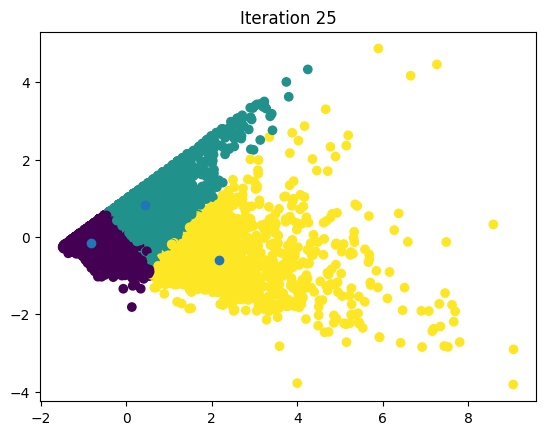

In [ ]:
# Mendefinisikan max_iterations sebagai jumlah maksimum iterasi yang akan dilakukan dalam algoritma K-means clustering.
max_iterations = 100
# Mendefinisikan centroid_count sebagai jumlah centroid atau klaster yang akan dibentuk.
centroid_count = 3

# Menginisialisasi centroids dengan menggunakan fungsi random_centroids(data, centroid_count) untuk mendapatkan centroid awal secara acak.
centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

#  Loop ini akan berjalan selama jumlah iterasi kurang dari max_iterations dan centroid tidak sama dengan centroid dari iterasi sebelumnya.
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
# Menghitung label klaster untuk setiap data dengan menggunakan fungsi     
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

Dengan melakukan iterasi ini, algoritma K-means clustering berusaha untuk mengoptimalkan posisi centroid sehingga data dapat dikelompokkan dengan baik ke dalam klaster yang sesuai. Visualisasi hasil klasterisasi pada setiap iterasi memungkinkan kita untuk melihat perubahan dalam penempatan klaster seiring dengan berjalannya algoritma.

In [ ]:
centroids

,0,1,2
CREDIT_LIMIT,1.620089,3.189111,3.628478
BALANCE,1.344767,1.383912,3.569395
MINIMUM_PAYMENTS,1.066284,1.044981,1.261381
PAYMENTS,1.163650,1.340008,1.562654


In [ ]:
labels.value_counts()

0    5567
1    2100
2    1283
dtype: int64

In [ ]:
df[labels == 0][["TENURE"] + df1]

,TENURE,CREDIT_LIMIT,BALANCE,MINIMUM_PAYMENTS,PAYMENTS
0,12,1000.0,40.900749,139.509787,201.802084
4,12,1200.0,817.714335,244.791237,678.334763
5,12,1800.0,1809.828751,2407.246035,1400.057770
7,12,2300.0,1823.652743,532.033990,679.065082
10,12,1200.0,1293.124939,2172.697765,1083.301007
...,...,...,...,...,...
8945,6,1000.0,28.493517,48.886365,325.594462
8946,6,1000.0,19.183215,864.000000,275.861322
8947,6,1000.0,23.398673,82.418369,81.270775
8948,6,500.0,13.457564,55.755628,52.549959


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(3)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [ ]:
pd.DataFrame(kmeans.cluster_centers_, columns=df1).T

,0,1,2
CREDIT_LIMIT,1.683520,3.317658,4.102795
BALANCE,1.384344,1.739416,4.125364
MINIMUM_PAYMENTS,1.074687,1.073329,1.359739
PAYMENTS,1.181057,1.436091,1.815179


## EVALUASI 

In [ ]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(df, labels)

Fungsi silhouette_score digunakan untuk menghitung skor siluet, yang merupakan metrik evaluasi untuk mengukur sejauh mana setiap sampel dalam suatu klaster serupa dengan satu sama lain dan berbeda dari klaster lainnya.

In [ ]:
silhouette_avg

0.35816555698978136

In [ ]:
# Pertama kita perlu membuat fungsi plot untuk plotting cluster
def plot_cluster(cluster_df):
    plot, ax = plt.subplots(2,4,figsize=(30,7),constrained_layout = True)
    sns.countplot(data=cluster_df,x="TENURE",ax=ax[1][3])
    for i,col in enumerate(data):
        sns.histplot(data=cluster_df,x=col,ax=ax[0][i],kde=True)
        sns.boxplot(data=cluster_df,x=col,ax=ax[1][i])

In [ ]:
# Kolom yang berisi numerikkal
data = ["BALANCE","PAYMENTS","CREDIT_LIMIT"]

In [ ]:
# Cluster 1
cluster1 = df[labels == 0]
# Cluster 2
cluster2 = df[labels == 1]
# Cluster 3
cluster3 = df[labels == 2]

In [ ]:
cluster1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.00,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.00,0.083333,1,1,7500.0,0.000000,864.000000,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.00,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.25,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12


In [ ]:
cluster1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,954.772058,0.867762,1508.145171,937.121714,571.501052,809.282602,0.591083,0.330658,0.413424,0.088979,2.205714,20.885238,7622.422078,2262.209331,391.424128,0.254618,11.760952
std,993.130601,0.238488,2020.166997,1535.526631,968.543877,1848.586418,0.389236,0.360828,0.401559,0.171180,5.905930,28.281941,2790.241102,2944.800431,445.789935,0.355907,0.922432
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4500.000000,0.000000,0.117036,0.000000,6.000000
25%,107.197194,0.818182,200.952500,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,6000.000000,591.514065,167.072817,0.000000,12.000000
50%,493.993152,1.000000,810.315000,328.400000,213.600000,0.000000,0.666667,0.166667,0.333333,0.000000,0.000000,12.000000,7000.000000,1240.920997,219.309211,0.000000,12.000000
75%,1725.994368,1.000000,2061.497500,1181.185000,778.805000,468.951394,1.000000,0.583333,0.833333,0.083333,1.000000,27.000000,8500.000000,2846.763983,539.979373,0.454545,12.000000
max,3560.977973,1.000000,20747.340000,13007.070000,12375.000000,17661.494860,1.000000,1.000000,1.000000,1.000000,107.000000,248.000000,25000.000000,34107.074990,6703.880744,1.000000,12.000000


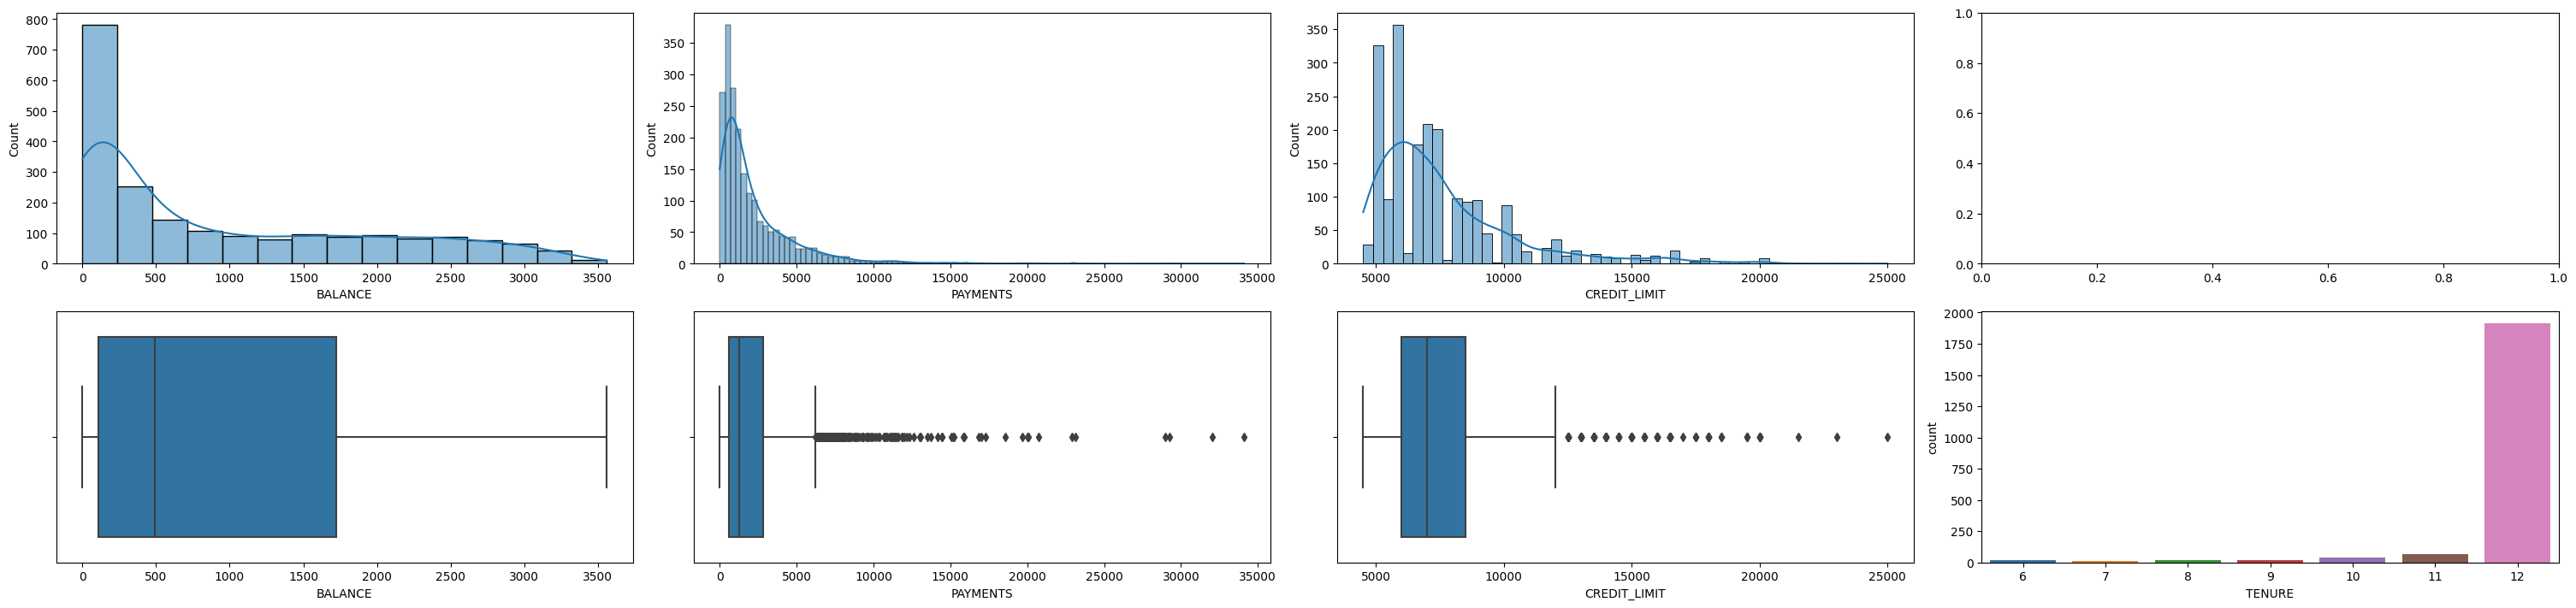

In [ ]:
# Menampilkan distribusi dari cluster1
plot_cluster(cluster1)

Ciri-Ciri Cluster 1 :

1. Di dominasi tenure 12
2. Terdapat minimal balance yaitu 0, maksimal 3.560 dan rata-rata 954
3. Terdapat minimal credit limit yaitu 4.500, maksimal 25.000 dan rata-rata 7.622
4. Terdapat minimal payment yaitu 0, maksimal 34.107 dan rata-rata 2.262

In [ ]:
cluster2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.0,95.40,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12
4,817.714335,1.000000,16.00,16.0,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.0,12
5,1809.828751,1.000000,1333.28,0.0,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.0,12
7,1823.652743,1.000000,436.20,0.0,436.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.0,12
10,1293.124939,1.000000,920.12,0.0,920.12,0.0,1.000000,0.000000,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.0,12


In [ ]:
cluster2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000
mean,837.174582,0.855310,583.477995,303.094742,280.673666,527.980629,0.457364,0.141020,0.349445,0.112812,2.419436,10.280582,2214.205357,1014.665039,641.847494,0.146298,11.380277
std,850.793465,0.254396,921.260527,710.042893,489.777303,987.806779,0.395308,0.241386,0.392271,0.170167,5.128525,15.094348,1068.739647,1292.964716,1644.082392,0.282492,1.507435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,80.350039,0.818182,12.110000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1200.000000,291.334655,160.750326,0.000000,12.000000
50%,605.744452,1.000000,263.040000,0.000000,66.750000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2000.000000,574.484351,267.813111,0.000000,12.000000
75%,1326.666922,1.000000,729.600000,289.815000,371.880000,718.480472,0.909091,0.166667,0.750000,0.166667,3.000000,12.000000,3000.000000,1251.438250,622.921011,0.125000,12.000000
max,3971.138765,1.000000,15704.040000,12618.860000,5463.730000,14127.466640,1.000000,1.000000,1.000000,1.166667,123.000000,217.000000,4800.000000,22099.478120,38512.124770,1.000000,12.000000


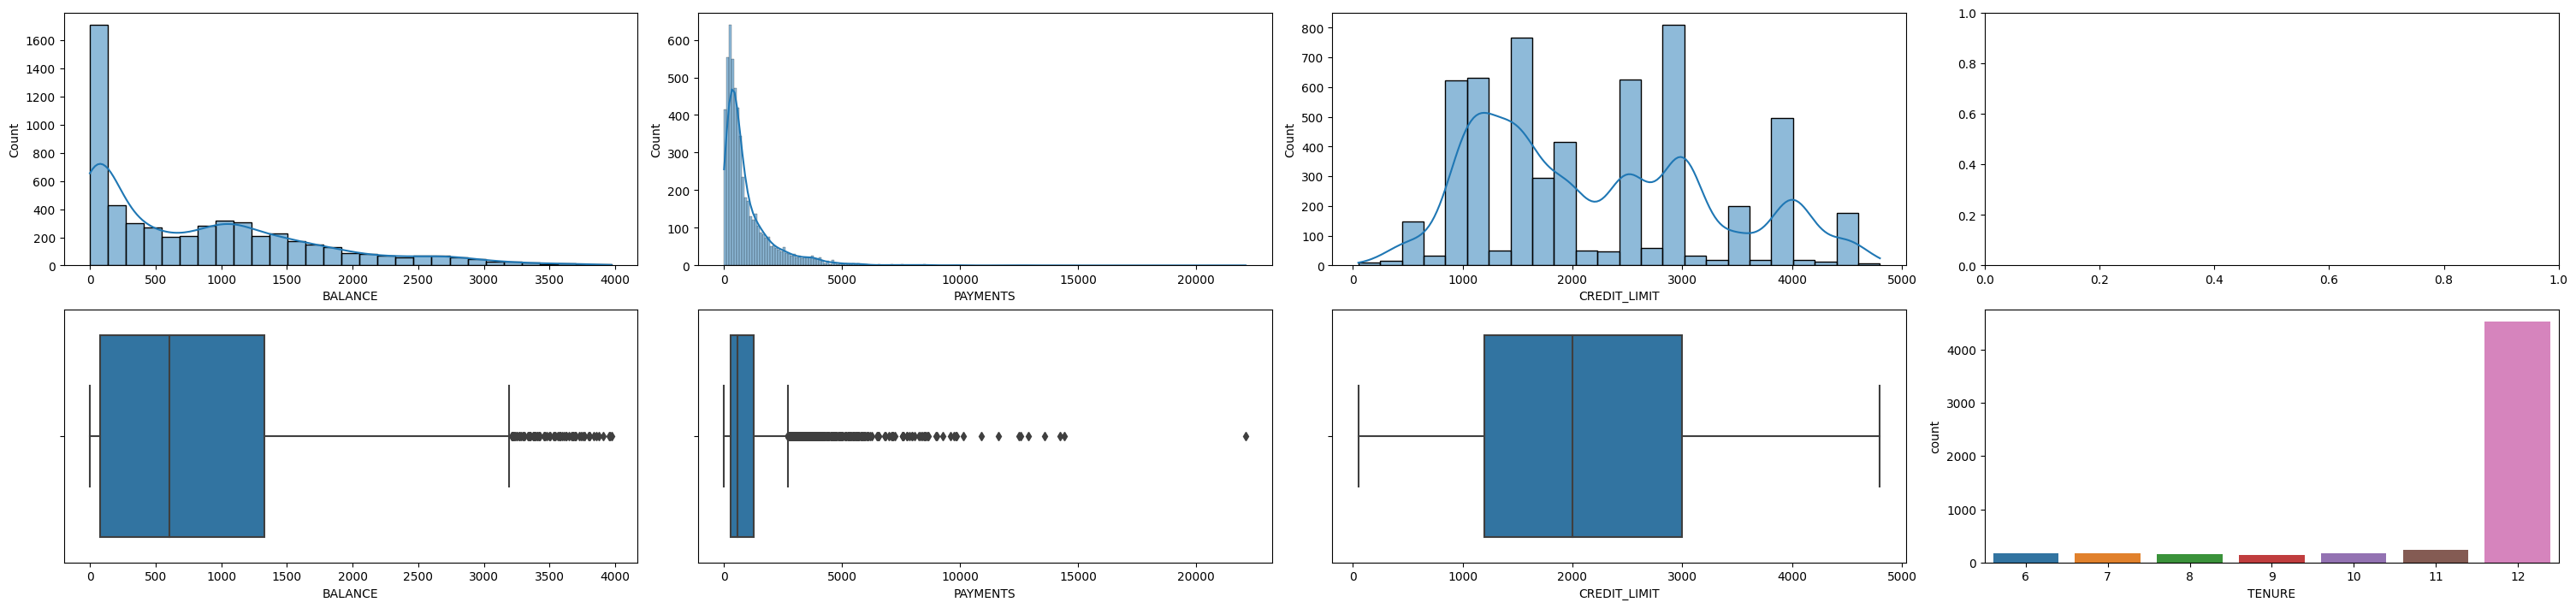

In [ ]:
# Menampilkan distribusi dari cluster2
plot_cluster(cluster2)

Ciri-Ciri Cluster 2 :

1. Di dominasi tenure 12
2. Terdapat minimal balance yaitu 0, maksimal 3.971 dan rata-rata 837
3. Terdapat minimal credit limit yaitu 50, maksimal 4.800 dan rata-rata 2.214
4. Terdapat minimal payment yaitu 0, maksimal 22.099 dan rata-rata 1.014

In [ ]:
cluster3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.0,12
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.0,12
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.0,12
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.0,11
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.0,12


In [ ]:
cluster3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000
mean,5718.220955,0.988122,1997.939517,1283.733780,714.257919,3212.887630,0.468603,0.259200,0.349309,0.307609,8.554949,23.820733,9268.709700,3984.690264,2602.827933,0.020739,11.713172
std,2305.290893,0.055931,4396.335775,3485.267717,1709.815515,3865.847436,0.419772,0.329568,0.406752,0.265402,10.994286,42.234162,3646.259081,5410.756525,4716.847868,0.093508,1.013346
min,1268.809031,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,0.000000,336.823302,0.000000,6.000000
25%,4123.031322,1.000000,0.000000,0.000000,0.000000,365.464763,0.000000,0.000000,0.000000,0.083333,1.000000,0.000000,6500.000000,1298.992035,1165.760493,0.000000,12.000000
50%,5177.774511,1.000000,473.510000,164.320000,48.330000,2308.315512,0.416667,0.083333,0.083333,0.250000,5.000000,7.000000,8500.000000,1951.218091,1613.203482,0.000000,12.000000
75%,6744.195020,1.000000,2027.495000,1167.075000,718.840000,4500.678113,1.000000,0.500000,0.750000,0.500000,12.000000,29.000000,11500.000000,4304.499712,2444.673710,0.000000,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


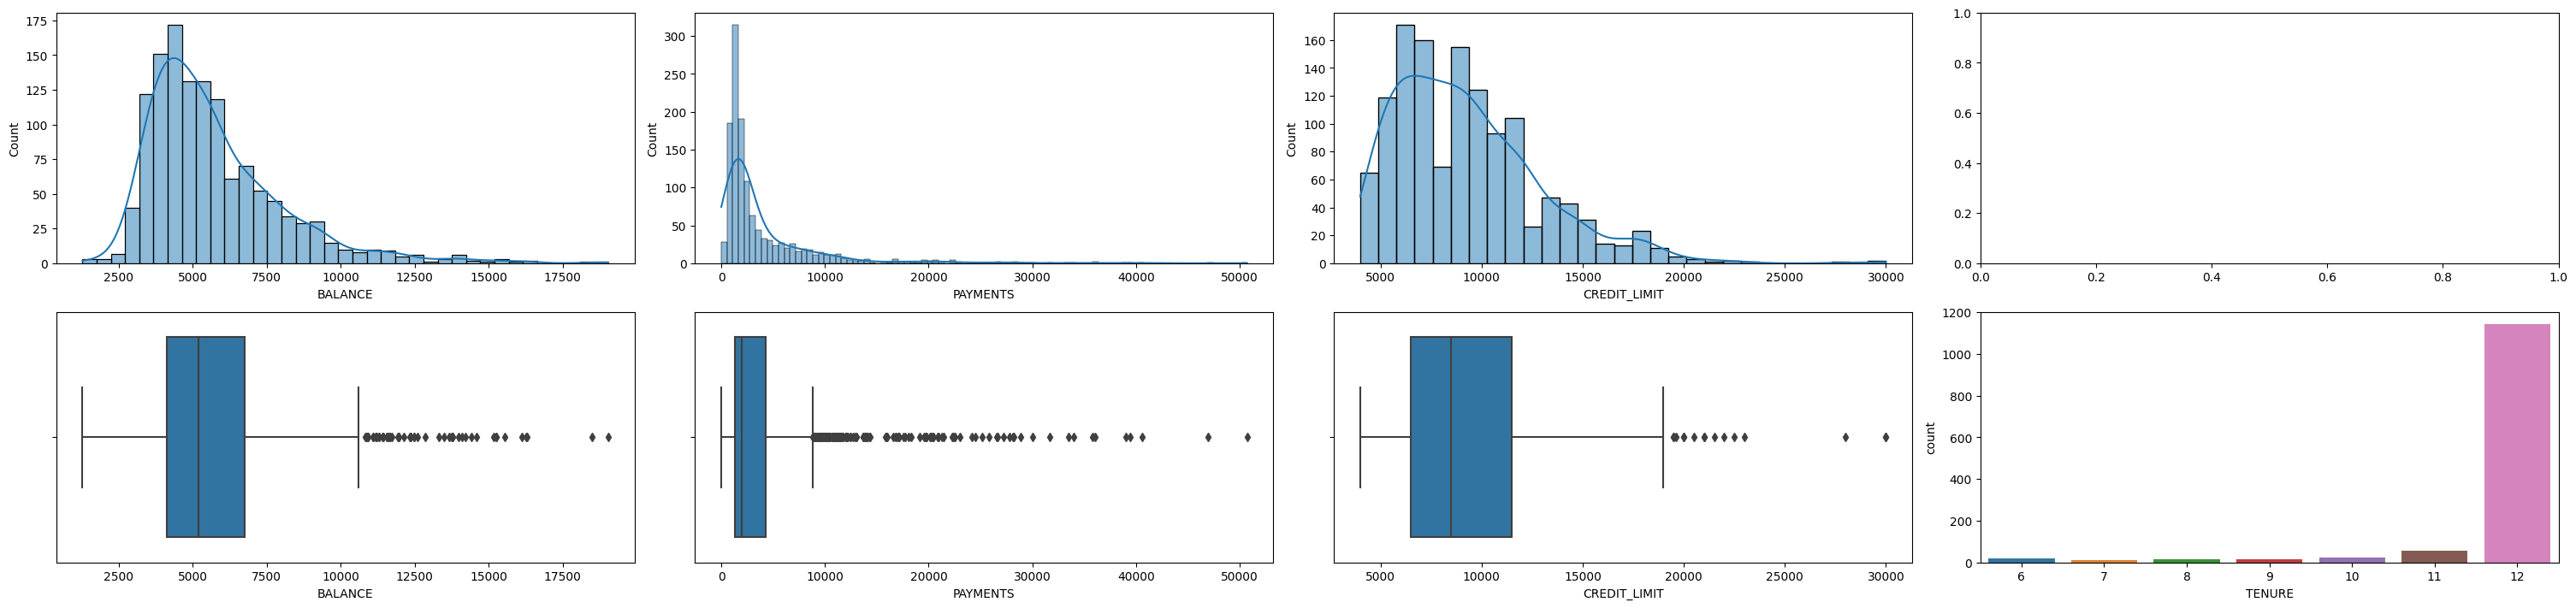

In [ ]:
# Menampilkan distribusi dari cluster1
plot_cluster(cluster3)

Ciri-Ciri Cluster 3 :

1. Di dominasi tenure 12
2. Terdapat minimal balance yaitu 1.268, maksimal 19.043 dan rata-rata 5.718
3. Terdapat minimal credit limit yaitu 4.000,  maksimal 30000 dan rata-rata 9.268
4. Terdapat minimal payment yaitu 0, maksimal 50.721 dan rata-rata 3.984

## Export Dataset

Menyimpan dataset yang yang sudah di cleaning untuk digunakan visualisasi lebih lanjut di Google Data Studio(Looker Studio)

In [ ]:
# mengekspor dataset ke file CSV
df.to_csv('Final_CC GENERAL.csv', index=False)